# Lab | Getting started with Tableau


Refer to the `files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv` dataset.

### Instructions

1. Load the dataset into a notebook.
2. Create a barplot of the number of customers per **Gender**.
3. Create a barplot of the number of customers per **EmploymentStatus** and **Gender**.
4. Identify **Measurements** and **Dimensions**. Are they the same as the ones in your Pandas dataframe? Modify accordingly.
5. Save as `unit-4-lab.tbwx`.

In [1]:
# Load libraries

import pandas as pd
import numpy as np

In [3]:
# Load the dataset into a notebook.

data = pd.read_csv('../../Afternoon/lab-getting-started-with-tableau/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


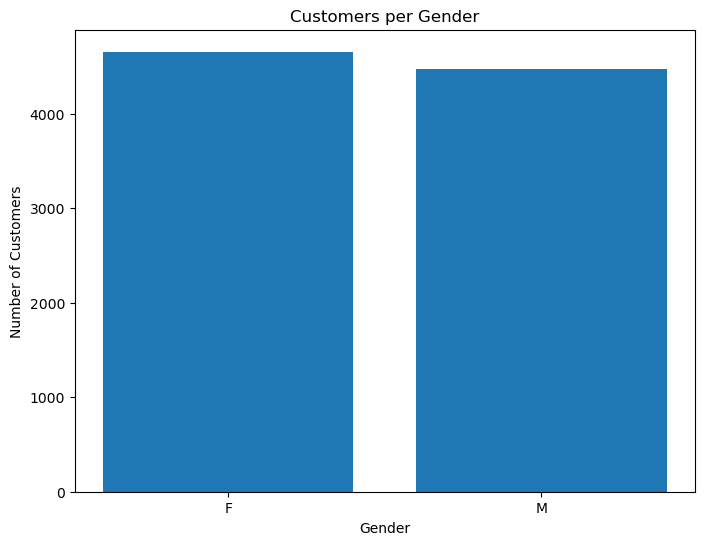

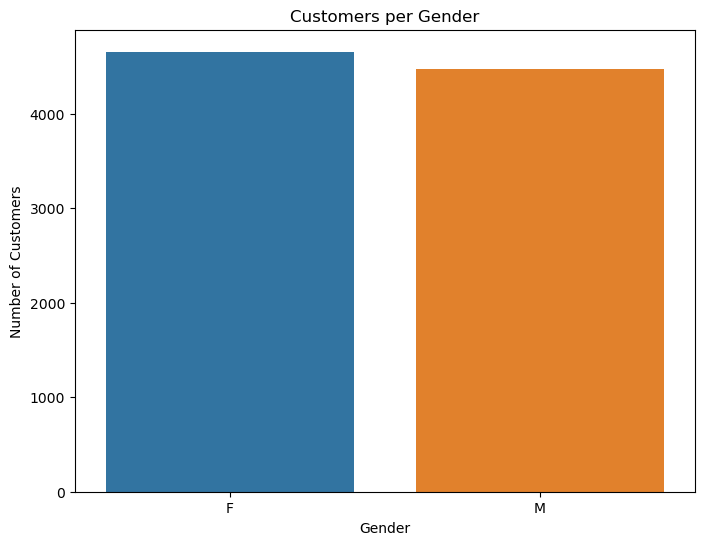

In [7]:
# Create a barplot of the number of customers per **Gender**:

# Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of customers per gender
gender_counts = data['Gender'].value_counts()

# Create the bar plot with Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customers per Gender')
plt.show()

# Create the bar plot with Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customers per Gender')
plt.show()

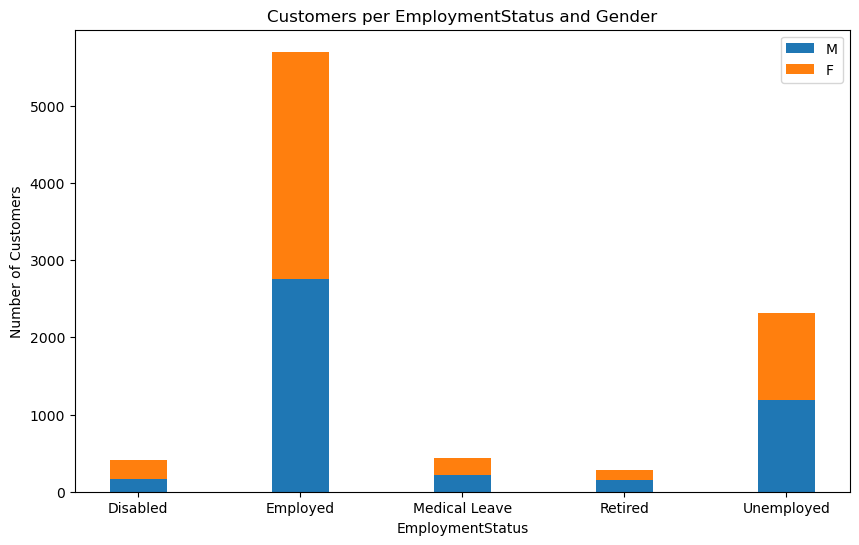

In [10]:
# Create a barplot of the number of customers per **EmploymentStatus** and **Gender**:
# Group and count the data
status_gender_counts = data.groupby(['EmploymentStatus', 'Gender']).size().unstack().fillna(0)

# Create the stacked barplot Matplotlib

plt.figure(figsize=(10, 6))
width = 0.35

statuses = status_gender_counts.index
x = range(len(statuses))

plt.bar(x, status_gender_counts['M'], width, label='M')
plt.bar(x, status_gender_counts['F'], width, bottom=status_gender_counts['M'], label='F')

plt.xlabel('EmploymentStatus')
plt.ylabel('Number of Customers')
plt.title('Customers per EmploymentStatus and Gender')
plt.xticks(x, statuses)
plt.legend()


# Identify **Measurements** and **Dimensions** in tableau
* Tableau is using a dimension on one axis and a measurement on the other. 

Dimensions: 
* Dimensions in Tableau are typically categorical variables, also known as qualitative or discrete variables. They represent attributes or characteristics that describe the data, but they are not numeric. 
* They define the categorical axes of your visualization.
* Can be placed in columns or rows

Measurements: 
* Measurements are typically numeric variables, also known as quantitative or continuous variables. 
* They represent values that can be measured and aggregated. 
* Can be placed in columns or rows

# Are they the same as the ones in your Pandas dataframe? 
No.
Pandas uses a different way of calculating and displaying the number of customers by gender than Tableau

Because Tableau categorizes the values ​​in a different way, you must use the Number of Policies measurement here to somehow display the number of customers. You can't use value_counts (Python) first to calculate the number of customers. As a result, you now have a different view in the bar plot in Tableau:

Pandas dataframe: 

plt.xlabel('Gender')
plt.ylabel('Number of Customers')
= Customers per Gender

plt.xlabel('EmploymentStatus')
plt.ylabel('Number of Customers') 
= Customers per EmploymentStatus and Gender

Tableau:
Columns = Gender (dimension)
Rows = Number of Policies (measurements) --> SUM(Number of Policies)
= Number of Policies per Gender

Columns = Employment Status and Gender (dimensions)
Rows = Number of Policies (measurement) --> SUM(Number of Policies)
= Number of Policies per EmploymentStatus and Gender

# Modify accordingly
How to modify this?